In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.columns
#samples_abs_df['mass']

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

In [2]:
#The different properties can be oberved in the columns of the dataframe
samples_abs_df.columns

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

### Sound absorption curves of the samples
Since the samples with different densities (d1, d2, d3) were developed applying compression, the thicknesses are different. In order to be comparable between them, the absorption coefficient is represented over the frequency (x axes) multiplied by the thickness of the sample. [Hz*m] 
 1. Twelve (12) different sample combinations (3 densities and 4 granulometries)

 2. Comparative between granulometry
 
 3. Comparative between densities

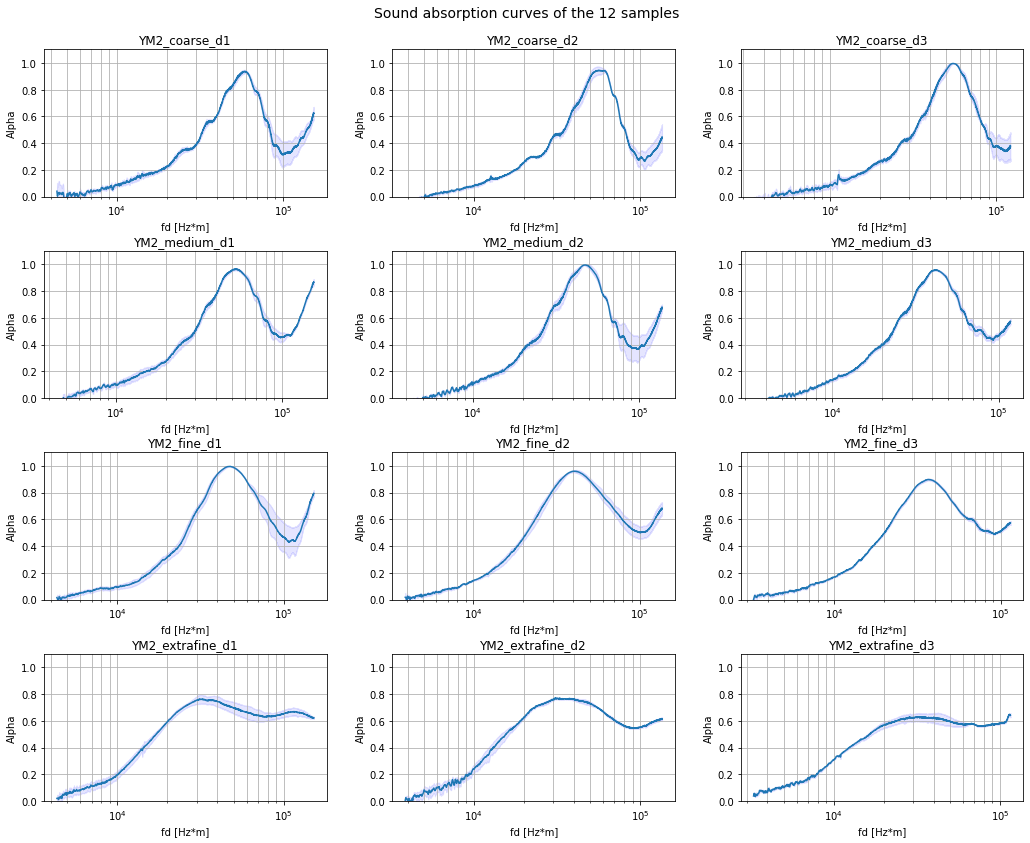

In [ ]:
ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows, ncols, figsize=(15,12))
ax = ax.flatten()
fig.tight_layout(pad=3.5)


for i, axe in enumerate(ax):
    abs_data = np.array(samples_abs_df.iloc[i]['abs_avg'])    #Averages sound absorption coefficient between 3 equal samples
    abs_dev = np.array(samples_abs_df.iloc[i]['abs_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    #axe.semilogx(freq, abs_data)   
    #axe.fill_between(freq, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(fd, abs_data)      #Plot over frequency*thickness
    axe.fill_between(fd, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    #axe.set_xlabel('Frequency [Hz]')
    axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 1.1])
    axe.set_ylabel('Alpha')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Sound absorption curves of the 12 samples', fontsize=16)
plt.show()




### 2. Comparison betweem different granulometry

- Observations: The peak resonance is lower with finer granulometry, and for each group the peak also goes to lower frequency for greater densities.

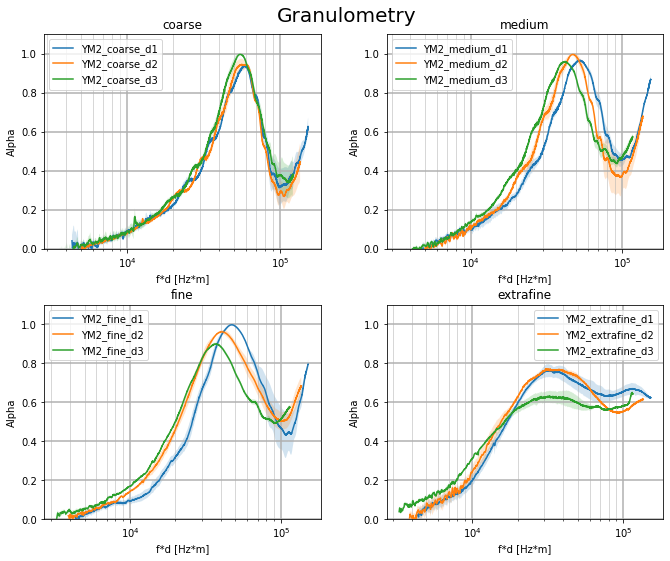

In [4]:
#%% Comparison between granulometry

fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(pad=3.5)
ax = ax.flatten()  #Flatten the array of axes

#Select data grouped by granulometry
group_by = ['coarse','medium','fine', 'extrafine']


for i, g in enumerate(group_by):
    granul_df = samples_abs_df[samples_abs_df['granul']==g]
    
    for j in range(granul_df.index.size):
        label = granul_df.index[j]
        alpha_avg = np.array(granul_df['abs_avg'].iloc[j])
        alpha_std = np.array(granul_df['abs_std'].iloc[j])
        
        fd = [f*granul_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].semilogx(fd, alpha_avg, label=label)
        ax[i].fill_between(fd, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, granul_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        ax[i].set_title(g)
        ax[i].set_xlabel('f*d [Hz*m]')
        ax[i].set_ylabel('Alpha')
        ax[i].set_ylim([0, 1.1])
        ax[i].legend()
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major')
        fig.suptitle('Granulometry', fontsize=20)
        
plt.show()

### 3. Comparison betweem different densities

- Observations: For each density the peak absorption goes lower in frequency when increasing the density. The less variation or ripple in the curve probably is due the higher porosity for finer granulometry.

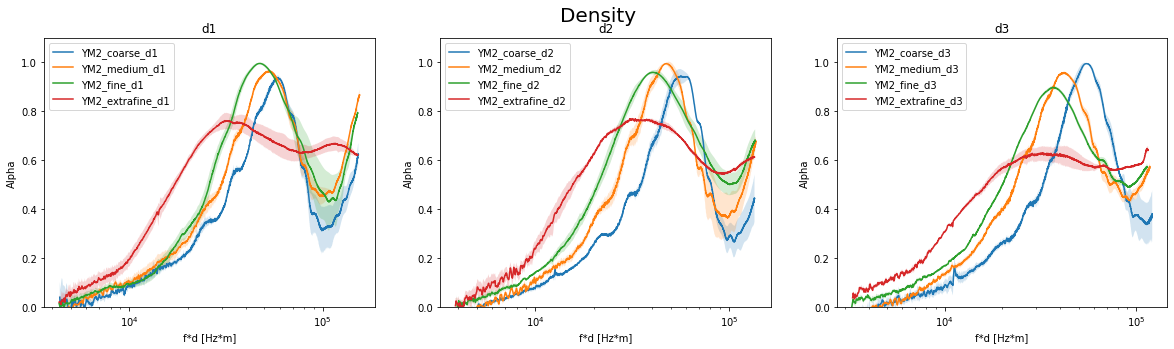

In [5]:

fig, ax = plt.subplots(1, 3, figsize=(17,5))
fig.tight_layout(pad=3.5)

#Select data grouped by density
group_by = ['d1','d2','d3']

for i, g in enumerate(group_by):
    dens_df = samples_abs_df[samples_abs_df['density']==g]
    
    for j in range(dens_df.index.size):
        label = dens_df.index[j]
        alpha_avg = np.array(dens_df['abs_avg'].iloc[j])  
        alpha_std = np.array(dens_df['abs_std'].iloc[j])  
        
        fd = [f*dens_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].semilogx(fd, alpha_avg, label=label)
        ax[i].fill_between(fd, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, dens_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        ax[i].set_title(g)
        ax[i].set_xlabel('f*d [Hz*m]')
        ax[i].set_ylabel('Alpha')
        ax[i].set_ylim([0, 1.1])
        ax[i].legend()
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major')
        fig.suptitle('Density', fontsize=20)
 
plt.show()

General observations:

### 4. Implementation of analytical models and inverse estimation of the macroscopical parameters

- Various analytical models: JCA, JCAL, HS, ...
- Estimation of the dynamic effective density and bulk modulus
- Estimation of the macroscopical parameters of the materials

In [6]:
import analmodels as am
import invmethods as im 
from analmodels import *

#Sample to analyze
#sample_selected = samples_abs_df.iloc[3]
sample_selected= samples_abs_df.loc['YM2_coarse_d1']   #Sample selection according to the indexes of the dataframe


# Initial values of JCA parameters (initial guess based on literature or measurement)
phi = 0.82  # Porosity
alpha_inf = 2.45  # Tortuosity
#sigma = float(sample_selected['resflux'])*1e-3  # flow resistivity [Ns/m^4]
sigma = 2000
r_por = 0.22  # std dev of size pore
lamb = 20e-6  # Viscous characteristic length [m]
lamb_prima = 50e-6  # Thermal characteristic length [m]

d = float(sample_selected['thickness'])*1e-3  # Sample thickness [m]

# Input parameters
#freq_data = freq
freq_data = np.arange(50, 5000, 1)
omega = 2 * np.pi * freq_data
v = 1.516e-5  # kinematic viscosity of air [m^2/s]
Np = 0.71  # Prandtl number for air
p0 = 101325  # Standard air pressure [Pa]
gamma = 1.4  # Heat capacity ratio of air
nu = 1.95e-5  # Dynamic viscosity of air [Pa.s]
rho0 = 1.204  # Density of air [kg/m^3]

temp = 24  #Temperature [°C]
c0 = 343  # Velocity of sound in air [m/s]
z0 = rho0 * c0  # Characteristic impedance of air



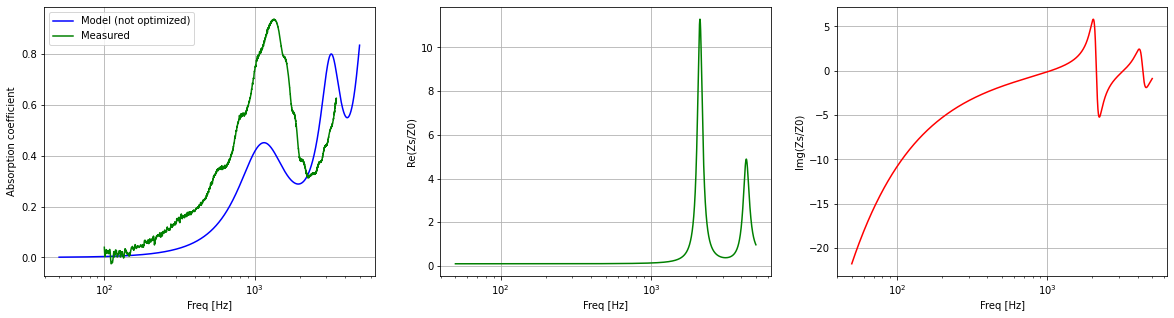

In [7]:
import analmodels as am

abs_meas = np.array(sample_selected['abs_avg'])

# Johnson-Champoux-Allard (JCA) model
d_JCA = am.dens_JCA(phi, alpha_inf, sigma, lamb, nu, rho0, omega)
b_JCA = am.bulk_JCA(phi, lamb_prima, p0, Np, gamma, nu, rho0, omega)

Zc_JCA = np.sqrt(d_JCA * b_JCA)  # Surface impedance
k_JCA = omega * np.sqrt(d_JCA / b_JCA)

z_JCA = -1j * Zc_JCA * (1/np.tan(k_JCA * d))

alpha_JCA = 1 - np.abs((z_JCA - z0) / (z_JCA + z0)) ** 2

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(17,5))
fig.tight_layout(pad=3.5)

ax[0].semilogx(freq_data, alpha_JCA, 'b-', label='Model (not optimized)', linewidth=1.5)
ax[0].semilogx(freq, abs_meas, 'g-', label='Measured', linewidth=1.5)
ax[0].set_ylabel('Absorption coefficient')
ax[0].set_xlabel('Freq [Hz]')
ax[0].grid(True)
ax[0].legend()
#plt.legend(['Experimental', 'Analytical JCA', 'COMSOL JCA'], loc='northwest')

ax[1].semilogx(freq_data, np.real(z_JCA / z0), 'g-', linewidth=1.5)
ax[1].set_ylabel('Re(Zs/Z0)')
ax[1].set_xlabel('Freq [Hz]')
ax[1].grid(True)

ax[2].semilogx(freq_data, np.imag(z_JCA / z0), 'r-', linewidth=1.5)
ax[2].set_ylabel('Img(Zs/Z0)')
ax[2].set_xlabel('Freq [Hz]')
ax[2].grid(True)


### Inverse estimation 

Estimation of the macroscopical parameters by inverse methods. A cost function is minimized and the absortion curves fitted using different methods (LS,..) and analytic models

#### Analytical models:
- JCA model
- JCAL model
- HS model
- ...

#### Optimization method:
- Non lineal Least Square
- Genetic algorithms
- Neural networks
- ...

In [8]:
sample_selected.name

'YM2_coarse_d1'

### Inverse estimation by Non Linear Least Square approach

- Faster implementation but has the risk to reach in a local minimun of the fitting (gradient approach)

In the code below it is possible to apply different analytical models for the inverse estimation process. It can be chosen between Johnson-Champoux-Allard (JCA), Johnson-Champoux-Allard-Lafarge (JCAL), Horoshenkov (HS). (to be extended) 
Given the starting guess points the values are estimated between the defined upper and lower bounds. For each method the Mean Squared Error (MSE) is calculated as a goodness descriptor of the fitting. 
The 5 macroscopical parameters porosity, tortuosity, flow resistivity, viscous characteristic length and thermal characteristic length (JCA). In case of HS the characteristic lengths are replaced by the pore size deviation. In JCAL model XX is added.

Macroscopical parameters of the sample JCA
ϕ      α_∞    σ    Λ        Λ'
0.3407 2.1562 27545 0.001000 0.000215
Mean Squared Error (MSE): 0.0014 

Macroscopical parameters of the sample HS
ϕ    α_∞     σ    dev_por
0.5068 1.9065 6073 0.200000
Mean Squared Error (MSE): 0.00221 

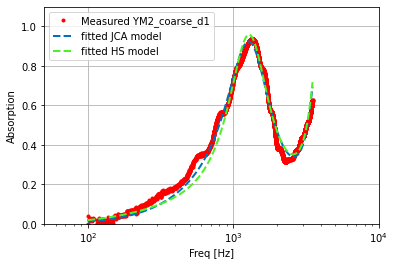

In [9]:
from scipy.optimize import curve_fit
from invmethods import *

#Measured data
xdata = freq
ydata = abs_meas 

# Model selection
model = ['JCA', 'HS', 'JCAL']    # Choose from ['JCA', 'JCAL', 'HS']

# Starting points for all the models (JCA, HS, JCAL)
startpt = [0.76, 1.83, 2284, 83e-6, 67e-6, 0.22]  #   [phi, alpha_inf, sigma, lambda, lambda_prima, dev_por(HS)]

# Constraints for all the models (JCA, HS, JCAL)
lb = [0.1, 1, 500, 0.22e-6, 0.22e-6, 0.20]  # Lower bound of parameters
ub = [0.99, 10, 100000, 1000e-6, 1000e-6, 0.24]  # Upper bound of parameters

#Inverse estimation of the macroscopical parameters
fitted_data, best_coef, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model[0], d)
fitted_data_jca, best_coef_jca, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model[0], d)
fitted_data_hs, best_coef_hs, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model[1], d)

#Mean Squared Error (MSE)
MSE_ls = np.mean((ydata-fitted_data)**2)
MSE_ls_jca = np.mean((ydata-fitted_data_jca)**2)
MSE_ls_hs = np.mean((ydata-fitted_data_hs)**2)

#Plotting
plt.figure()
plt.semilogx(xdata, ydata, 'ro', markersize=3, label=f'Measured {sample_selected.name}')
plt.semilogx(xdata, fitted_data_jca, '--', color=[0, 0.4470, 0.7410], linewidth=2, label=f'fitted JCA model')
plt.semilogx(xdata, fitted_data_hs, '--', color=[0.3, 0.9470, 0.1410], linewidth=2, label=f'fitted HS model')
plt.grid(True)
plt.ylabel('Absorption')
plt.xlabel('Freq [Hz]')
plt.xlim([50, 10000])
plt.ylim([0, 1.1])
plt.legend(loc='upper left')

# Print macroscopical parameters of the sample
print('Macroscopical parameters of the sample JCA')
print('{:<4} {:>5} {:>4} {:>4} {:>9}'.format('ϕ', 'α_∞', 'σ', 'Λ', "Λ'"))
print('{:.4f} {:.4f} {:.0f} {:.6f} {:.6f}'.format(*best_coef_jca))
print(f'Mean Squared Error (MSE): {MSE_ls_jca.round(5)} ', end='')
print('\n')
print('Macroscopical parameters of the sample HS')
print('{:<4} {:<7} {:<4} {:<4}'.format('ϕ', 'α_∞', 'σ', 'dev_por'))
print('{:.4f} {:.4f} {:.0f} {:.6f}'.format(*best_coef_hs))
print(f'Mean Squared Error (MSE): {MSE_ls_hs.round(5)} ', end='')

#perr = np.sqrt(np.diag(cov))
#print('{:.4f}'.format(perr))
#print(f'Sum Squared Residuals: {np.sum((abs_meas - myfun(x_JCA, freq_data))**2):.4f}')

### Genetic algorithm approach

- More computational cost but avoid the possibility of stoping in a local minimum (Non-Gradient Approach)

In [10]:
#Here to implement the algorithms that were tested in the notebook test_GA.ipynb

### Neural Network

- Difficulty of making a correct training of the network

### 5. Transfer Matrix Implementation (TMM) for multilayer components

- Evaluate different combinations of density and granulometry in order to maximize the absorption coefficient in a broad frequency range

In [11]:
import TMM as tmm

